## Zmienne wybrane do analizy - wraz z opisami

1. Attrition_Flag - Określa, czy klient jest aktywny, czy odszedł od banku : ('Existing Customer' jesli klient jest aktywny, 'Attrited Customer' jesli klient odszedł)
2. Customer_Age - Wiek klienta w latach 
3. Gender - Płeć klienta : ('M' jesli mężczyzna, 'F' jesli kobieta)
4. Dependent_count - Liczba osób na utrzymaniu klienta 
5. Education_Level - Poziom wykształcenia klienta : ('College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown')
6. Marital_Status - Stan cywilny klienta : ('Divorced', 'Married', 'Single', 'Unknown')
7. Income_Category - Przedział dochodowy klienta : (np. '$120K +', '$40K - $60K', '$60K - $80K')
8. Card_Category - Typ karty kredytowej klienta : ('Blue', 'Gold', 'Platinum', 'Silver')
9. Months_on_book - Liczba miesięcy, przez które klient jest związany z bankiem 
10. Total_Relationship_Count - Całkowita liczba produktów bankowych, z których korzysta klient : 
11. Months_Inactive_12_mon - Liczba miesięcy, w których klient był nieaktywny w ciągu ostatnich 12 miesięcy : (numeryczna)
12. Contacts_Count_12_mon - Liczba kontaktów z bankiem w ciągu ostatnich 12 miesięcy 
13. Credit_Limit - Limit kredytowy na karcie klienta 
14. Total_Revolving_Bal - Całkowite saldo odnawialne na karcie kredytowej 
15. Avg_Open_To_Buy - Otwarta linia kredytowa na zakup (średnia z ostatnich 12 miesięcy) 
16. Total_Amt_Chng_Q4_Q1 - Zmiana w wydatkach na karcie między czwartym a pierwszym kwartałem 
17. Total_Trans_Amt - Całkowita kwota transakcji dokonanych przez klienta (ostatnie 12 miesięcy) 
18. Total_Trans_Ct - Całkowita liczba transakcji dokonanych przez klienta (ostatnie 12 miesięcy) 
19. Total_Ct_Chng_Q4_Q1 - Zmiana w liczbie transakcji między czwartym a pierwszym kwartałem 
20. Avg_Utilization_Ratio - Średni współczynnik wykorzystania karty 

## Podział zmiennych na stymulanty, destymulanty i zmienne neutralne:

### Stymulanty: 
1. Customer_Age – starsi klienci mogą być bardziej stabilni finansowo 
2. Dependent_count – może wskazywać na większe zaangażowanie w produkty bankowe 
3. Months_on_book – dłuższa współpraca jest korzystna 
4. Total_Relationship_Count – więcej produktów oznacza większe zaangażowanie klienta 
5. Credit_Limit – większy limit może wskazywać na większe zaufanie banku do klienta 
6. Total_Trans_Amt – większe wydatki są korzystne dla banku 
7. Total_Trans_Ct – większa liczba transakcji oznacza większą aktywność klienta 
8. Total_Amt_Chng_Q4_Q1 – wzrost wydatków jest korzystny 
9. Total_Ct_Chng_Q4_Q1 – wzrost liczby transakcji jest korzystny 

### Dystymulanty: 
1. Months_Inactive_12_mon – mniejsza nieaktywność jest lepsza 
2. Contacts_Count_12_mon – mniej kontaktów może oznaczać mniej problemów 
3. Total_Revolving_Bal – niższe saldo oznacza mniejsze zadłużenie 
4. Avg_Utilization_Ratio – niższe wykorzystanie limitu jest lepsze (mniejsze ryzyko) 

### Zmienne neutralne: 
1. Attrition_Flag – zmienna docelowa w modelowaniu predykcyjnym 
2. Gender – płeć nie ma wpływu na jakość klienta 
3. Education_Level – poziom wykształcenia może być neutralny lub stymulantą 
4. Marital_Status – stan cywilny może być neutralny lub stymulantą 
5. Income_Category – wyższe dochody mogą być zmienną neutralną lub stymulantą (w zależności od strategii banku) 
6. Card_Category – kategoria karty może być zmienną neutralną lub stymulantą (również w zależności od strategii banku) 
7. Avg_Open_To_Buy – zmienna neutralna albo stymulanta w zależności czy bank chce promować większe wykorzystanie limitów kredytowych. 

## Import potrzebnych bibliotek do analizy danych

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Wczytanie ramki danych

In [65]:
df = pd.read_csv("BankChurners.csv")

Usuwamy niepotrzebne kolumny - pierwszą kolumnę z numerami klientów, która nie jest istotna oraz dwie ostatnie według instrukcji załączanej do ramki danych

In [66]:
df = df.drop(["CLIENTNUM",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
             "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" ], 
             axis=1)

## Podział na zmienne kategoryczne i numeryczne

In [67]:
numerical_features = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index) # zmienne numeryczne
categorical_features = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index) # zmienne kategoryczne

## Obliczenie średniej, odchylenia standardowego, minimum, maksimum i wszystkich kwartyli w tym mediany

In [68]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Obliczenie skośności

In [69]:
df[numerical_features].skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

Wyświetlenie typów kolumn i nie mamy braków danych, zatem nie musimy ich obsługiwać.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Histogramy

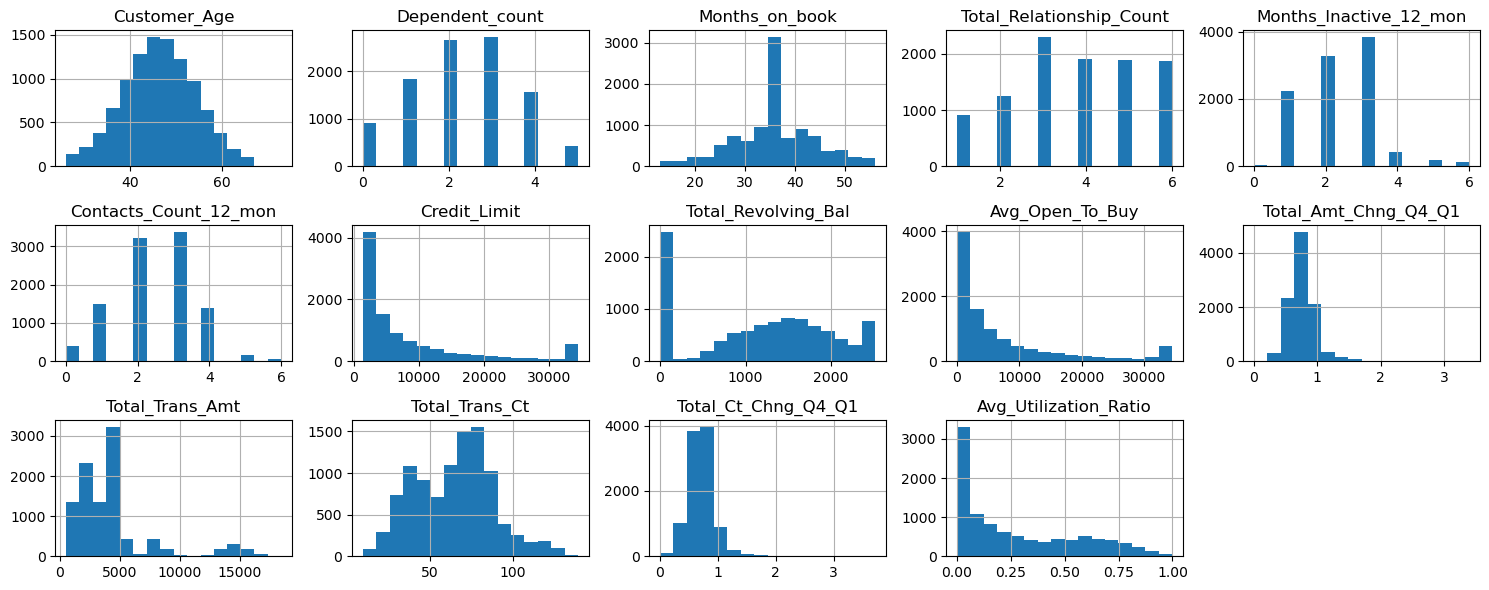

In [71]:
df.hist(bins=16, figsize=(15, 6), layout=(3, 5))
plt.tight_layout()
plt.show()

## Wykresy pudełkowe - przed obsłużeniem outliers

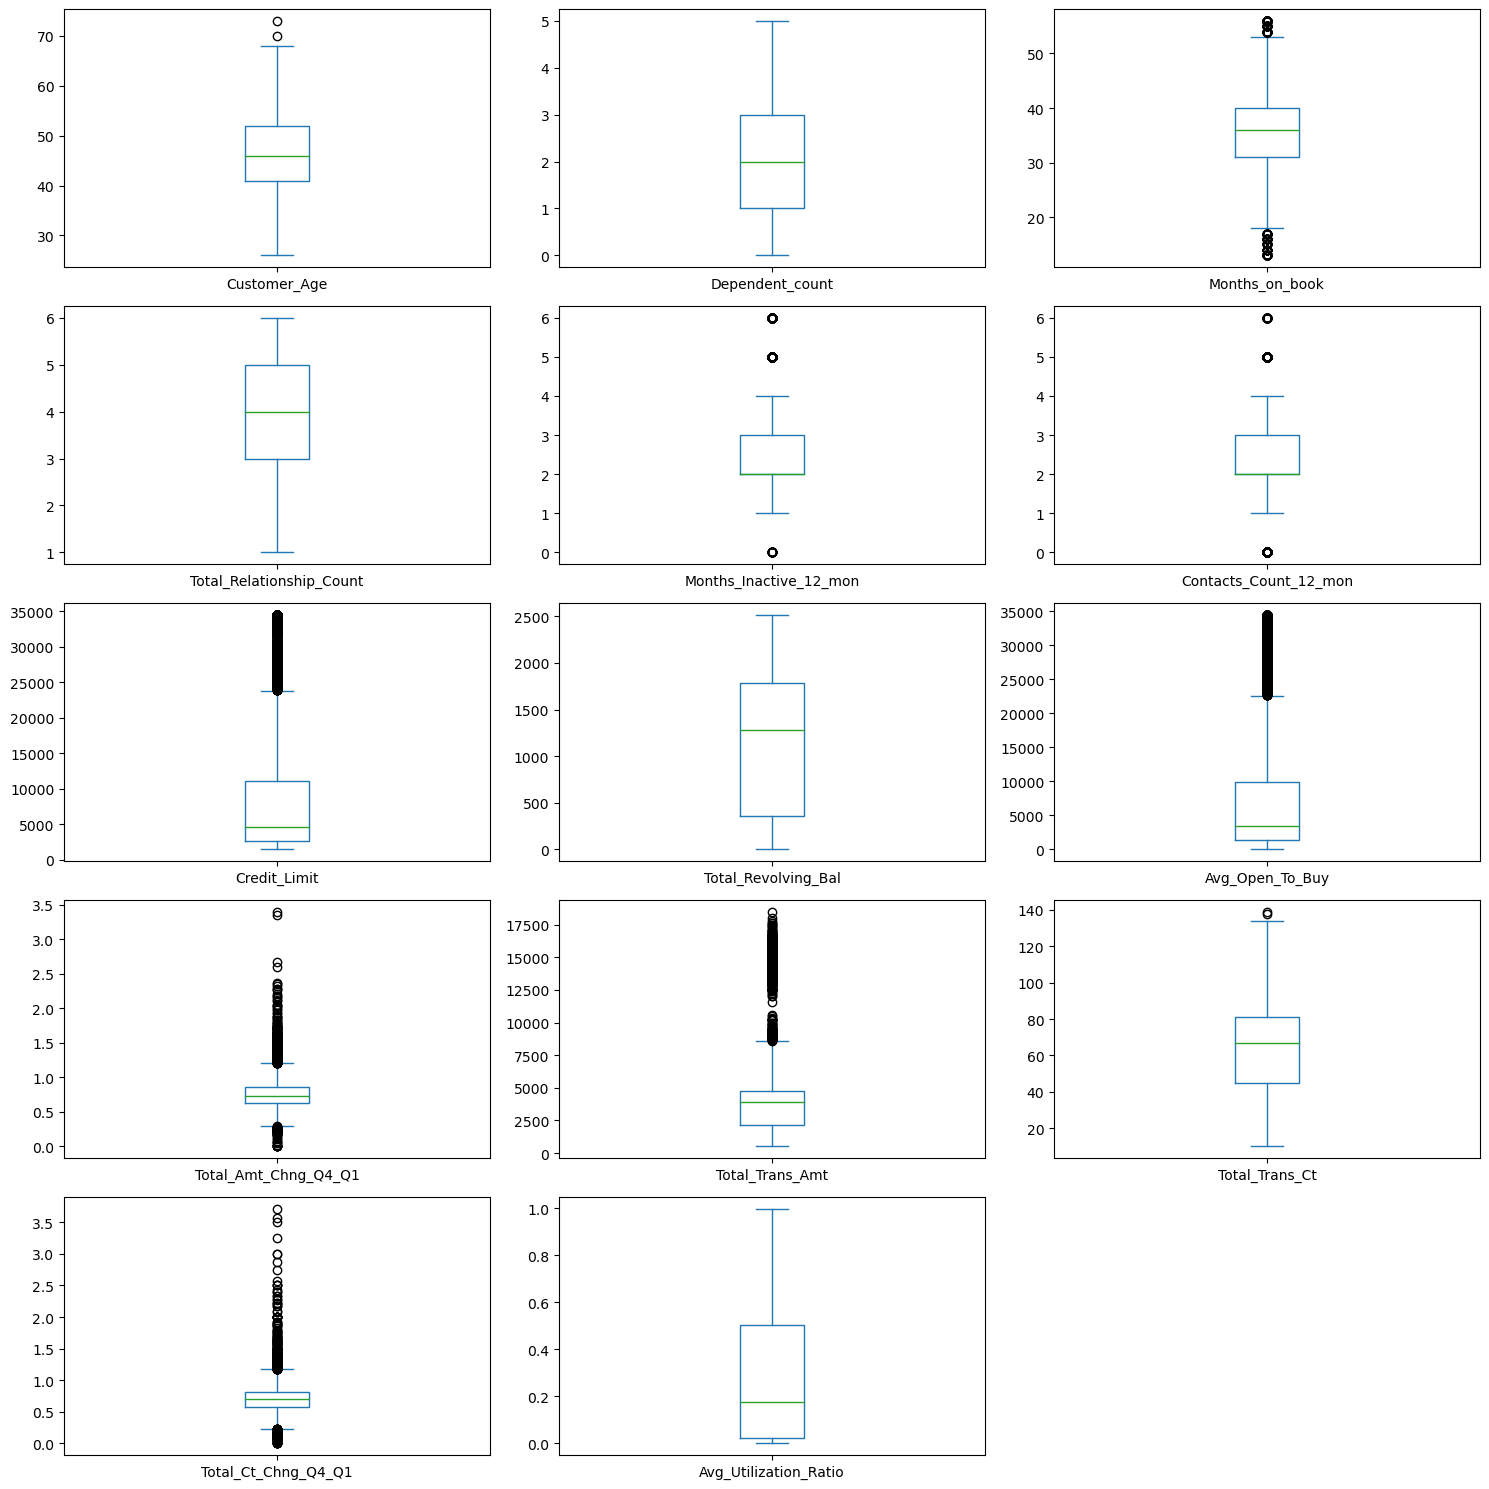

In [72]:
df.plot.box(subplots=True, layout=(5, 3), figsize=(15, 15))
plt.tight_layout()
plt.show()

## Wykresy pudełkowe i histogramy - po obsłużeniu outliers
Usuwamy 0.5% najbardzej odstających obserwacji usuwamy 0.25% z lewej i 0.25% z prawiej strony w następujący sposób:

In [73]:
lower_bound = df[numerical_features].quantile(0.0025)
upper_bound = df[numerical_features].quantile(0.9975)
df = df[(df[numerical_features] >= lower_bound) & (df[numerical_features] <= upper_bound)]

Po tej operacji wykresy wyglądają następująco:

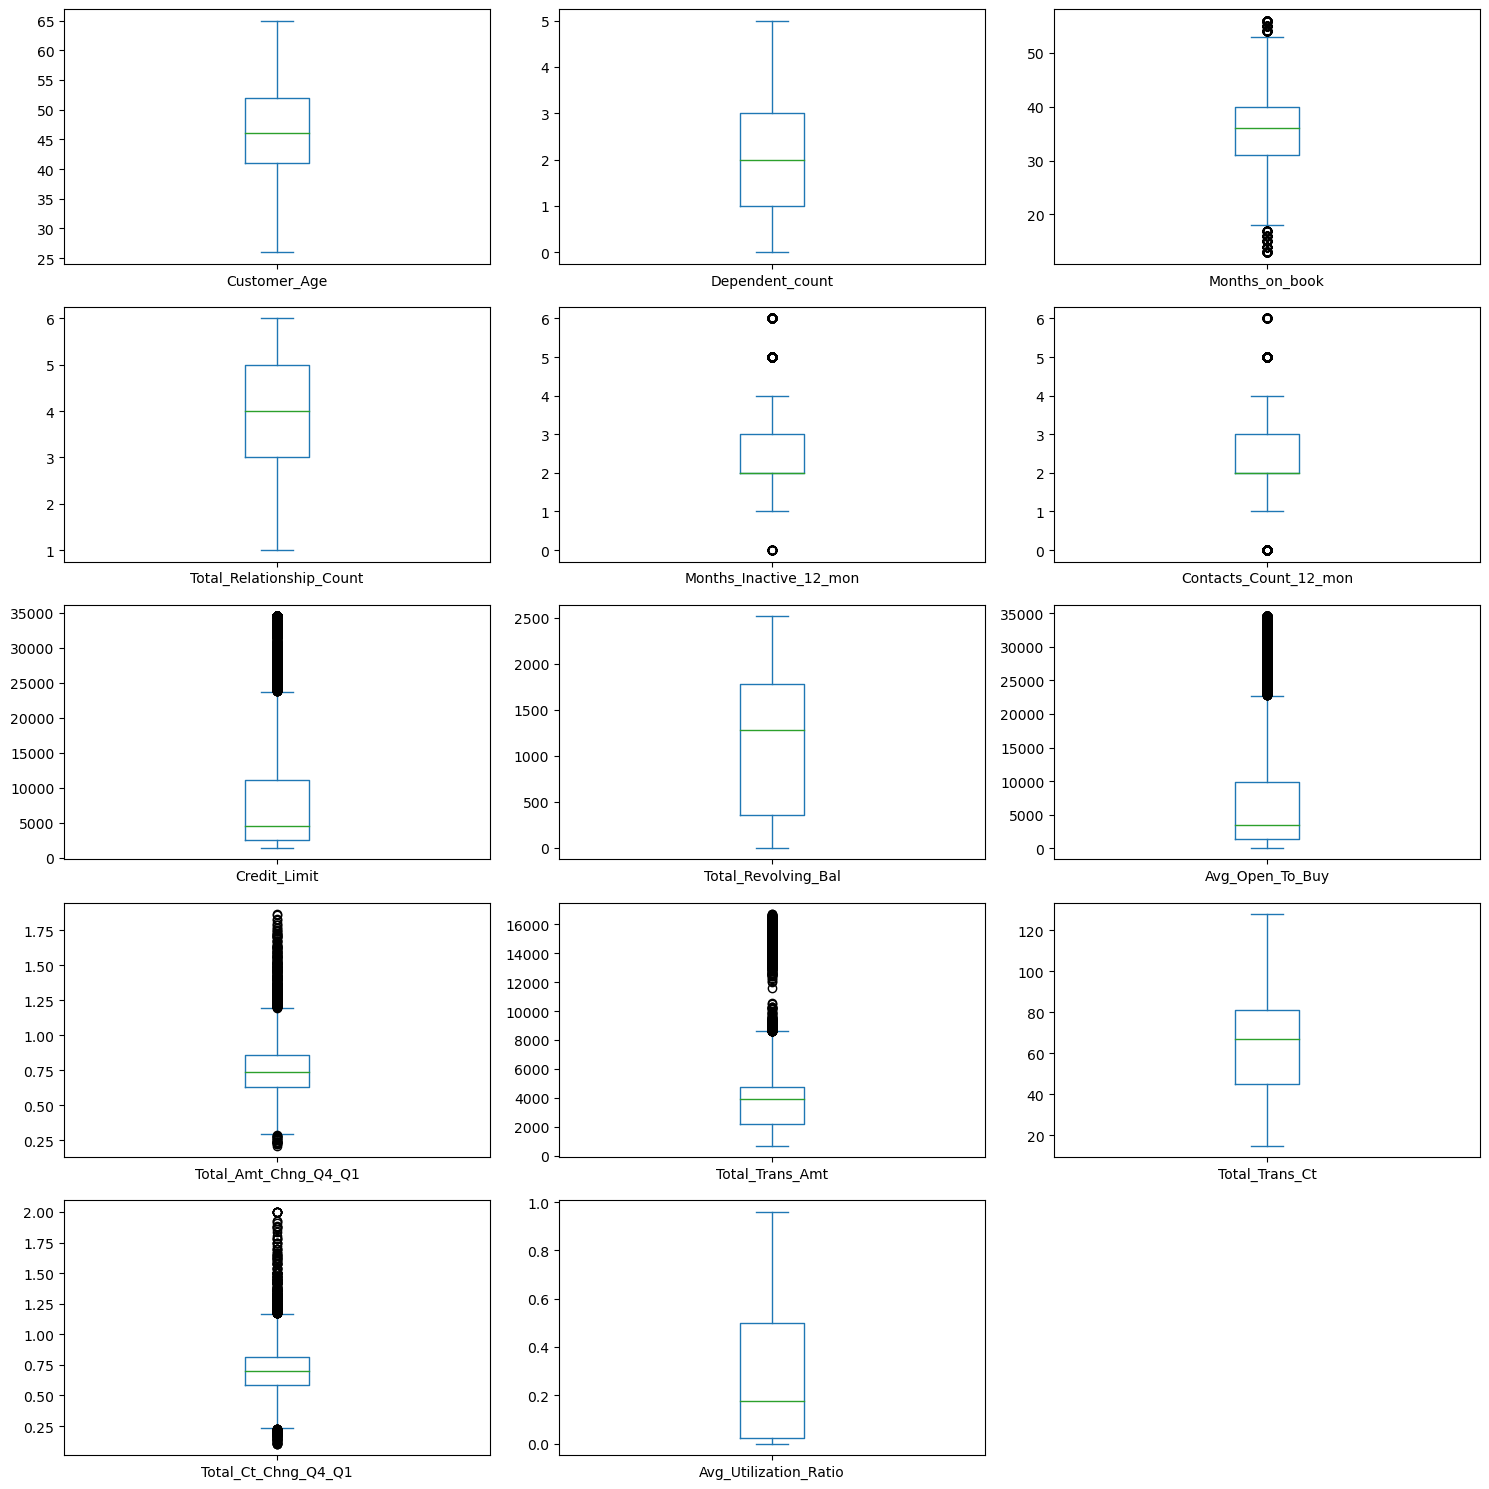

In [74]:
df.plot.box(subplots=True, layout=(5, 3), figsize=(15, 15))
plt.tight_layout()
plt.show()

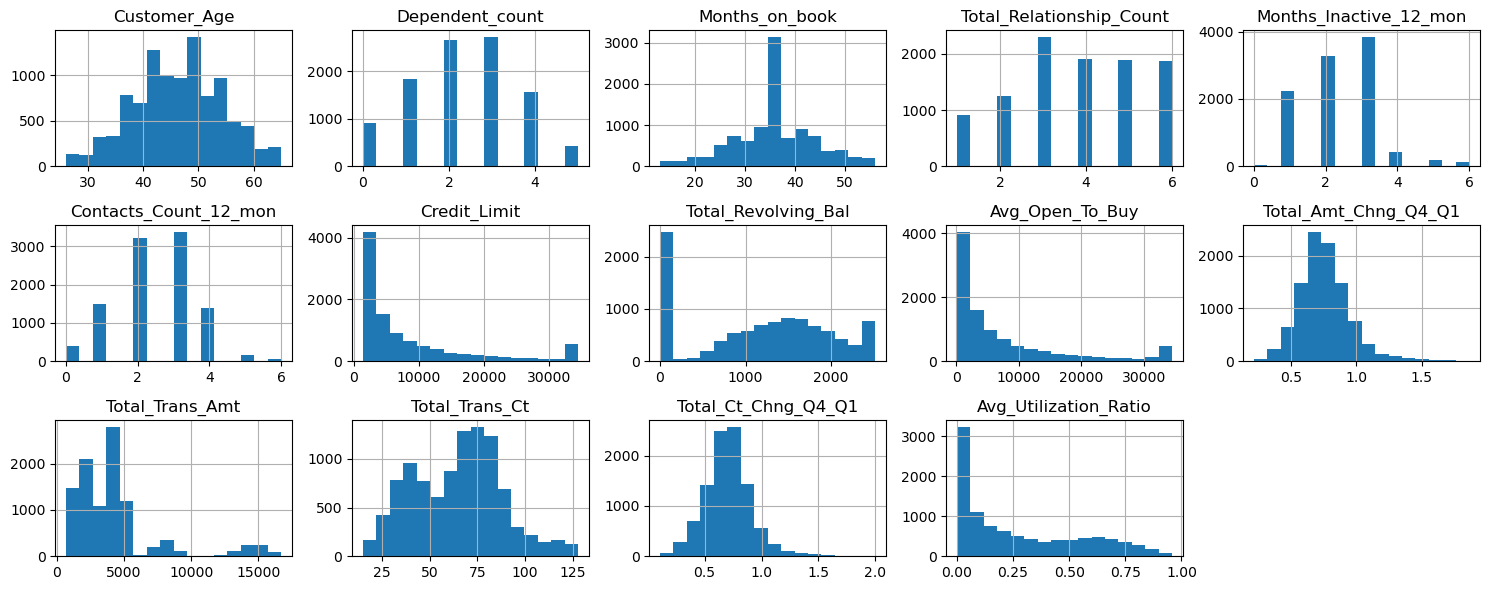

In [75]:
df.hist(bins=16, figsize=(15, 6), layout=(3, 5))
plt.tight_layout()
plt.show()

## Obliczenie korelacji

In [76]:
df[numerical_features].corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.118628,0.788253,-0.010974,0.053165,-0.018151,0.003373,0.013511,0.001480,-0.074185,-0.040271,-0.061448,-0.024610,0.007907
Dependent_count,-0.118628,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.067998,-0.038037,0.028226,0.051699,0.010059,-0.036908
Months_on_book,0.788253,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006191,-0.056354,-0.034846,-0.048953,-0.017452,-0.005227
Total_Relationship_Count,-0.010974,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072906,0.043852,-0.354223,-0.243900,0.039435,0.069011
Months_Inactive_12_mon,0.053165,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016144,-0.025928,-0.033892,-0.040957,-0.041799,-0.008625
Contacts_Count_12_mon,-0.018151,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.026304,-0.012556,-0.116750,-0.150738,-0.091419,-0.058173
Credit_Limit,0.003373,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995988,0.013579,0.173552,0.074920,-0.006641,-0.482657
Total_Revolving_Bal,0.013511,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.045062,0.051005,0.061648,0.052417,0.094071,0.622921
Avg_Open_To_Buy,0.001480,0.067998,0.006191,-0.072906,-0.016144,0.026304,0.995988,-0.045062,1.000000,0.008370,0.167325,0.069338,-0.016067,-0.538400
Total_Amt_Chng_Q4_Q1,-0.074185,-0.038037,-0.056354,0.043852,-0.025928,-0.012556,0.013579,0.051005,0.008370,1.000000,0.053281,0.023182,0.336978,0.035579


## Generacja heat mapy korelacji

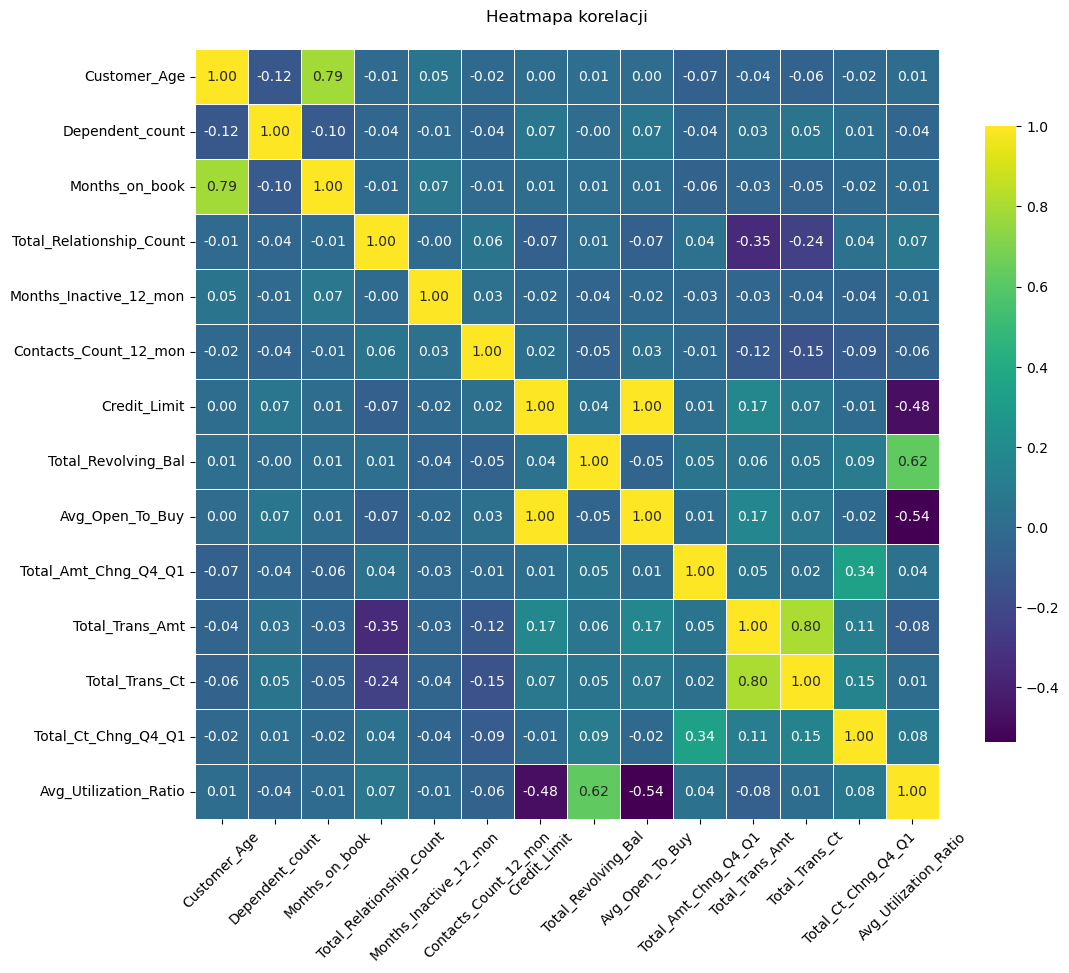

In [77]:
corr = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap='viridis',  
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.title("Heatmapa korelacji", pad=20)
plt.show()